In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
import glob
logs = glob.glob('/artemis/readout/adr_logs/Standby*201*.txt')
logs.sort()
print len(logs)

1399


In [3]:
import pandas as pd
import joblib

In [49]:
def from_csv(x):
    try:
        df = pd.DataFrame.from_csv(x)
        #print x
        return df
    except Exception,e:
        print e,x
        return None

In [1]:
28e9/2e6

14000.0

In [51]:
pp = joblib.Parallel(n_jobs=20,verbose=5)

In [52]:
dfs = pp(joblib.delayed(from_csv)(x) for x in logs)

[Parallel(n_jobs=20)]: Done   1 out of 1399 | elapsed:    0.4s remaining:  9.6min
[Parallel(n_jobs=20)]: Done 281 out of 1399 | elapsed:  1.5min remaining:  5.8min
[Parallel(n_jobs=20)]: Done 561 out of 1399 | elapsed:  3.6min remaining:  5.4min
[Parallel(n_jobs=20)]: Done 841 out of 1399 | elapsed:  6.1min remaining:  4.0min
[Parallel(n_jobs=20)]: Done 1121 out of 1399 | elapsed:  8.4min remaining:  2.1min
[Parallel(n_jobs=20)]: Done 1399 out of 1399 | elapsed: 12.0min finished


list index out of range /artemis/readout/adr_logs/Standby-05_05_2015-15_24_44.txt
list index out of range /artemis/readout/adr_logs/Standby-05_05_2015-15_28_11.txt
list index out of range /artemis/readout/adr_logs/Standby-05_11_2015-16_18_00.txt
list index out of range /artemis/readout/adr_logs/Standby-05_12_2015-14_31_49.txt
list index out of range /artemis/readout/adr_logs/Standby-05_11_2015-21_54_46.txt
list index out of range /artemis/readout/adr_logs/Standby-05_14_2015-03_30_08.txt
list index out of range /artemis/readout/adr_logs/Standby-05_12_2015-22_04_40.txt
list index out of range /artemis/readout/adr_logs/Standby-05_19_2015-14_21_50.txt
list index out of range /artemis/readout/adr_logs/Standby-05_21_2015-14_51_08.txt
list index out of range /artemis/readout/adr_logs/Standby-05_19_2015-20_09_46.txt
list index out of range /artemis/readout/adr_logs/Standby-05_07_2015-13_56_15.txt
list index out of range /artemis/readout/adr_logs/Standby-05_08_2015-15_31_49.txt
list index out o

In [53]:
len([x for x in dfs if x is not None])

1360

In [54]:
df = pd.concat([x for x in dfs if x is not None])

In [26]:
df.shape

(190383, 29)

In [29]:
df.columns

Index([u'921_R', u'922_1_V', u'922_2_V', u'922_3_V', u'922_4_V', u'923A1_R',
       u'923A2_R', u'960V', u'ADR 1K', u'ADR 50mK', u'Auxiliary', u'Current',
       u'H20 Inlet Temp', u'H20 Outlet Temp', u'Helium Temp',
       u'High Side Press', u'Log Comments', u'Low Side Press', u'Magnet Diode',
       u'Magnet RTD', u'Oil Temp', u'PS_I', u'PS_V', u'PT 3K', u'PT 60K',
       u'Pressure', u'RLeads', u'Test Time', u'Tset'],
      dtype='object')

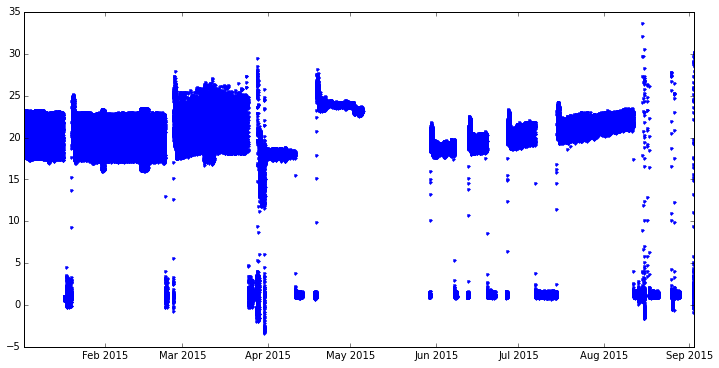

In [45]:
figure(figsize=(12,6))
plot(df.index,df['H20 Outlet Temp']-df['H20 Inlet Temp'],'.')

(-10, 10)

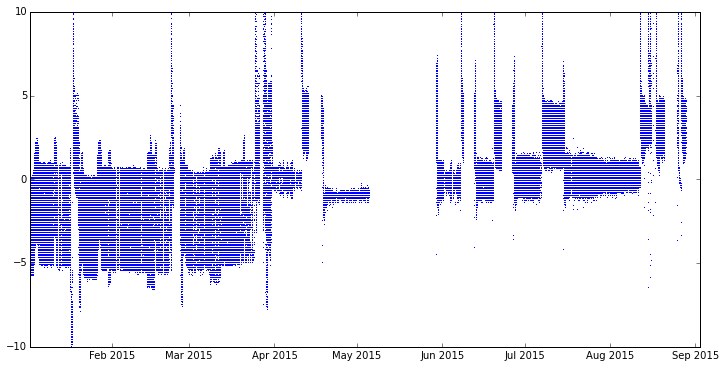

In [43]:
figure(figsize=(12,6))
plot(df.index,df['Oil Temp']-df['H20 Outlet Temp'],',')
ylim(-10,10)

In [39]:
def farh(x):
    return (x*9/5.+32)

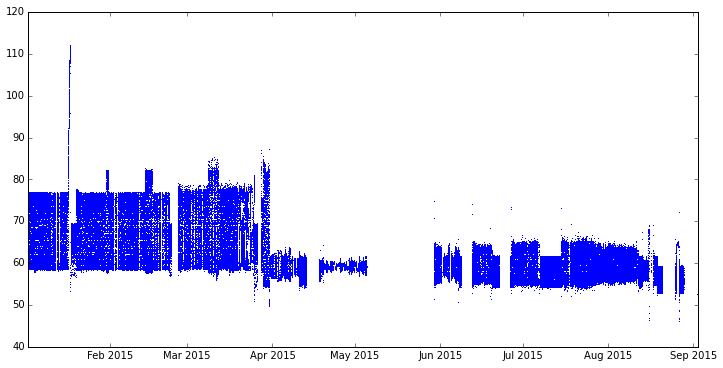

In [40]:
figure(figsize=(12,6))
plot(df.index,farh(df['H20 Inlet Temp']),',')

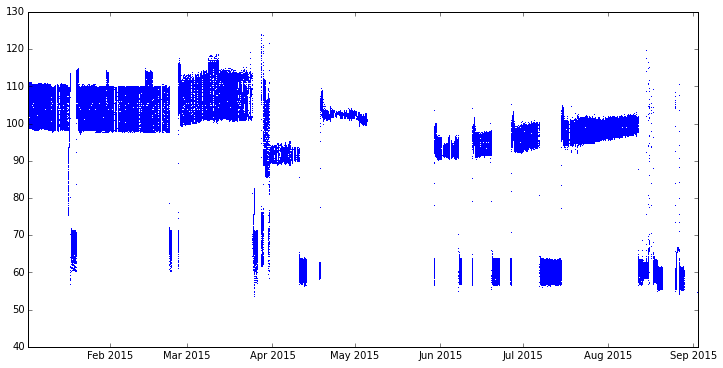

In [41]:
figure(figsize=(12,6))
plot(df.index,farh(df['H20 Outlet Temp']),',')

In [55]:
df.to_hdf('/artemis/readout/adr_logs/standby_logs.h5','logs')

In [56]:
!ls -lhtr /artemis/readout/adr_logs/standby_logs.h5

-rwxrwxr-x 1 500 500 8.9G Sep  2  2015 /artemis/readout/adr_logs/standby_logs.h5
